In [1]:
using Revise
using RealNeuralNetworks
using RealNeuralNetworks.NeuralNets
using LightGraphs
using MetaGraphs
using CSV
using Query
using DataFrames
using JLD2
using Plots
using Colors
using Clustering
using HDF5


const DIR="../01_data"

"../01_data"

In [2]:
groundTruthClassList = Vector{Set{Int}}()
push!(groundTruthClassList, Set([77648,77710,77300,77705]))
push!(groundTruthClassList, Set([77148,77625,77641,77692]))
push!(groundTruthClassList, Set([76355,76487,76267,76350]))
push!(groundTruthClassList, Set([77805,77460,77163,77797]))
push!(groundTruthClassList, Set([76189,76185,76877,76829]))
@show groundTruthClassList
@assert 77648 in groundTruthClassList[1]
groundTruthCellIdList = Vector{Int}()
for k in 1:5
    push!(groundTruthCellIdList, groundTruthClassList[k]...)
end
groundTruthCellIdList

groundTruthClassList = Set{Int64}[Set([77710, 77300, 77648, 77705]), Set([77148, 77692, 77625, 77641]), Set([76487, 76267, 76350, 76355]), Set([77805, 77797, 77163, 77460]), Set([76189, 76185, 76877, 76829])]


20-element Vector{Int64}:
 77710
 77300
 77648
 77705
 77148
 77692
 77625
 77641
 76487
 76267
 76350
 76355
 77805
 77797
 77163
 77460
 76189
 76185
 76877
 76829

In [3]:
# df = CSV.read("psd.csv")
# @show size(df)

# df =  @from i in df begin                                     
#     @where  i.presyn_seg  >=0 &&                  
#             i.postsyn_seg >=0        
#     @select i                                                  
#     @collect DataFrame                                         
# end    

In [4]:
cellIdList = h5read(joinpath(DIR, "data.h5"), "neuronIdList");
# println("number of neurons: ${}")
@show length(cellIdList)

length(cellIdList) = 2563


2563

In [5]:
syn = CSV.read(joinpath(DIR, "synapses_valid.csv"), DataFrame)
# @load "valid_cell_id_list.jld" cellIdList
cellIdSet = Set(cellIdList)
syn =  @from i in syn begin                                     
    @where     i.presyn_segid  <=maximum(cellIdList) &&          
            i.presyn_segid  >=minimum(cellIdList) &&             
           i.postsyn_segid <=maximum(cellIdList) &&              
            i.postsyn_segid >=minimum(cellIdList) &&             
               round(Int,i.presyn_segid.value) in cellIdSet &&   
            round(Int,i.postsyn_segid.value) in cellIdSet &&
           i.presyn_segid !== i.postsyn_segid
    @select i                                                  
    @collect DataFrame                                         
end       
# @save joinpath(DIR, "synapses.jld") synapses    
# @load "synapses.jld" synapses
size(syn)
# syn = synapses

(68744, 23)

In [6]:
# only keep the cellId that have some connection 
cellIdSet = Set(syn[!, :presyn_segid]) ∪ Set(syn[!, :postsyn_segid]) 
# cellIdList = [map(x->round(Int, x), cellIdSet)...]

# cellIdList = groundTruthCellIdList
# @load "valid_cell_id_list.jld" cellIdList


# cellIdList = ellIdList
size(cellIdList)

(2563,)

In [7]:
# df =  @from i in syn begin                                     
#     @where     i.presyn_seg  == i.postsyn_seg  
#     @select i                                                  
#     @collect DataFrame                                         
# end   
# @show size(df)
# df

In [8]:
# @load "neuron_dict.jld" neuronDict

# cellIdSet = Set(cellIdList)
# for key in keys(neuronDict)
#     if !(key in cellIdSet)
#         delete!(neuronDict, key)
#     end
# end

# neuronDict
# cellIdList = keys(neuronDict)

In [9]:
neuralNet = NeuralNet(syn; cellIdList=cellIdList)

┌ Warning: no skeleton attatched: 
│   cellId = 82140
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 82142
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 82143
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 82145
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 82146
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 82160
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 82161
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 76292
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76293
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76348
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76349
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76350
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76351
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76353
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 76538
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76539
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76540
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76541
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76542
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76543
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76544
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 76682
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76684
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76688
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76690
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76691
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76692
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76693
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 76880
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76883
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76884
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76885
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76886
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76887
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 76889
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77024
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77025
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77026
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77027
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77029
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77030
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77031
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77126
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77127
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77128
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77132
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77135
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77137
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77138
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77336
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77338
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77339
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77341
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77342
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77344
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77348
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77471
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77472
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77483
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77484
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77485
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77486
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77487
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77597
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77598
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77599
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77602
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77605
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77607
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77610
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77757
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77758
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77759
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77765
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77766
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77767
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77768
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 77887
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77889
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77890
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77891
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77892
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77893
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 77894
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78064
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78065
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78082
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78083
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78086
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78087
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78088
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78168
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78169
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78171
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78172
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78173
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78174
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78175
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78310
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78313
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78317
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78318
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78320
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78321
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78328
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78453
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78454
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78457
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78459
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78460
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78465
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78466
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78629
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78630
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78631
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78632
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78633
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78634
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78635
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78775
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78776
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78777
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78778
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78779
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78781
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78782
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78849
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78850
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78851
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78852
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78853
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78854
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78855
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 78948
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78949
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78953
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78955
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78956
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78957
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 78958
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79072
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79074
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79077
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79078
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79080
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79083
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79084
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79180
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79181
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79182
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79183
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79184
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79185
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79187
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79268
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79269
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79270
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79271
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79273
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79274
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79275
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79373
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79377
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79378
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79379
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79382
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79383
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79385
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79491
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79492
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79494
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79498
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79500
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79501
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79503
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79587
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79642
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79643
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79645
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79646
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79647
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79649
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79722
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79723
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79724
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79725
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79726
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79728
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79730
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79810
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79811
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79812
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79813
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79815
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79816
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79817
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 79911
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79912
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79913
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79915
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79916
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79918
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 79919
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 80179
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80180
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80181
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80185
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80187
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80188
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80190
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 80292
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80294
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80297
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80298
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80299
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80300
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80301
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 80517
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80518
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80519
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80524
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80526
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80527
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80529
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 80646
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80647
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80648
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80652
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80654
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80655
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80662
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 80763
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80764
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80768
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80773
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80775
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80777
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80787
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 80963
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80965
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80966
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80967
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80971
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80972
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 80973
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 81088
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81089
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81090
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81092
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81095
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81097
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81101
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 81311
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81312
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81313
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81315
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81317
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81319
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81322
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 81441
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81443
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81445
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81447
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81449
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81487
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81488
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

┌ Warning: no skeleton attatched: 
│   cellId = 81675
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81682
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81683
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81684
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81686
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81687
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:82
┌ Warning: no skeleton attatched: 
│   cellId = 81688
└ @ RealNeuralNetworks.NeuralNets /Users/jwu/.

number of self connection synapses: 0


{2563, 41153} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [10]:
# using GraphPlot
# using Colors

# # Generate n maximally distinguishable colors in LCHab space.
# nodefillc = distinguishable_colors(nv(neuralNet), colorant"blue")
# p = gplot(neuralNet; layout=circular_layout, nodefillc=nodefillc, arrowlengthfrac=0.02) #, nodelabel=cellIdList)
# using Compose
# draw(SVG("plots/circular_connectivity.svg"), p)
# # draw(PNG("plots/circular_connectivity.png"), p)
# p

In [11]:
# p = gplot(neuralNet; layout=spectral_layout, nodefillc=nodefillc, arrowlengthfrac=0.02) #, nodelabel=cellIdList)
# using Compose
# draw(SVG("plots/spectral_connectivity.svg"), p)
# # draw(PNG("plots/spectral_connectivity.png"), p)
# p

In [12]:
# p = gplot(neuralNet; nodefillc=nodefillc, arrowlengthfrac=0.02) #, nodelabel=cellIdList)
# using Compose
# draw(SVG("plots/connectivity.svg"), p)
# # draw(PNG("plots/connectivity.png"), p)
# p

In [13]:
# plot connectivity matrix
synConnMatrix = NeuralNets.get_synapse_number_connectivity_matrix(neuralNet)
# synConnMatrix = NeuralNets.get_synapse_size_connectivity_matrix(neuralNet)
@show maximum(synConnMatrix)
@show minimum(synConnMatrix)
# 
I = findall(!iszero, synConnMatrix)
X = getindex.(I, 1)
Y = getindex.(I, 2)
V = synConnMatrix[I]


maximum(synConnMatrix) = 19
minimum(synConnMatrix) = 0


41153-element SparseArrays.SparseVector{Int64, Int64} with 41153 stored entries:
  [1    ]  =  2
  [2    ]  =  1
  [3    ]  =  1
  [4    ]  =  1
  [5    ]  =  1
  [6    ]  =  1
  [7    ]  =  1
  [8    ]  =  2
  [9    ]  =  1
  [10   ]  =  1
           ⋮
  [41143]  =  1
  [41144]  =  4
  [41145]  =  1
  [41146]  =  1
  [41147]  =  1
  [41148]  =  1
  [41149]  =  1
  [41150]  =  1
  [41151]  =  1
  [41152]  =  1
  [41153]  =  1

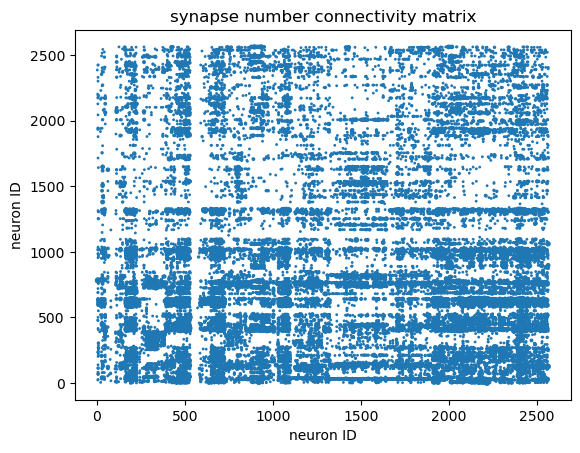

In [14]:
# using Plots
# pyplot()
using PyPlot
PyPlot.figure()
PyPlot.scatter(X,Y,V./maximum(V)*20)

xlabel("presynapse neuron ID")
ylabel("postsynapse neuron ID")
title("synapse number connectivity matrix")

PyPlot.savefig("/Users/jwu/Pictures/synapse_num_connectivity_matrix.png", dpi=600)

In [15]:
N = length(cellIdList)
distanceMatrix = zeros(Float64, N,N)
for i in 1:length(X)
    x = X[i]
    y = Y[i]
    v = V[i]
    distanceMatrix[x,y] = v + synConnMatrix[y,x]
    distanceMatrix[y,x] = distanceMatrix[x,y]
end 
distanceMatrix = maximum(distanceMatrix) .- distanceMatrix
@show maximum(distanceMatrix)
@show minimum(distanceMatrix)

maximum(distanceMatrix) = 19.0
minimum(distanceMatrix) = 0.0


0.0

In [16]:

# @show distanceMatrix
#hierachical clustering
using Clustering
using Pkg
clust = Clustering.hclust( distanceMatrix, :average)


# using StatsPlots
# StatsPlots.plot(clust)

Hclust{Float64}([-758 -1439; -447 -449; … ; -1955 2560; -2159 2561], [0.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0  …  19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0], [2159, 1955, 1615, 1726, 1904, 8, 2319, 2054, 2361, 2529  …  356, 381, 359, 734, 88, 367, 369, 106, 11, 163], :average)

In [17]:
Vector(cellIdList[clust.order])

2563-element Vector{Int64}:
 80734
 80244
 79534
 79733
 80042
 82164
 81095
 80532
 81182
 81756
 80266
 80748
 76858
     ⋮
 77057
 77096
 77063
 77098
 77070
 77895
 76403
 77082
 77084
 76457
 82173
 76614

In [18]:
# #plot heat map
# gr()
# # rearrange distance matrix according to order
# reorderedDistanceMatrix = zeros(distanceMatrix)
# for (i,o1) in enumerate(clust.order)
#     for (j, o2) in enumerate(clust.order)
#         reorderedDistanceMatrix[i,j] = distanceMatrix[o1,o2]
#     end 
# end 
# @show maximum(distanceMatrix)
# @show maximum(reorderedDistanceMatrix)
# # reorderedDistanceMatrix ./= maximum(reorderedDistanceMatrix)
# Plots.heatmap(clust.order, clust.order, reorderedDistanceMatrix)

In [19]:
clust.order

2563-element Vector{Int64}:
 2159
 1955
 1615
 1726
 1904
    8
 2319
 2054
 2361
 2529
 1965
 2170
  246
    ⋮
  351
  380
  356
  381
  359
  734
   88
  367
  369
  106
   11
  163

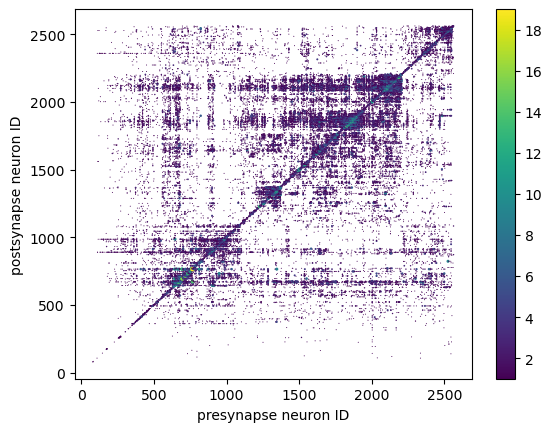

In [44]:
# rearrange distance matrix according to order
reorderedSynConnMatrix = zeros(Int64, size(synConnMatrix))
for (i,o1) in enumerate(clust.order)
    for (j, o2) in enumerate(clust.order)
        if i!=j
            reorderedSynConnMatrix[i,j] = synConnMatrix[o1,o2]
        end
    end 
end 

# X,Y,V = findnz(reorderedSynConnMatrix)
I = findall(!iszero, reorderedSynConnMatrix)
X = getindex.(I, 1)
Y = getindex.(I, 2)
V = reorderedSynConnMatrix[I]

using PyPlot
PyPlot.scatter(X,Y,V./maximum(V)*10, V, cmap=PyPlot.cm_get_cmap("viridis"), edgecolors="None")
PyPlot.colorbar()
xlabel("presynapse neuron ID")
ylabel("postsynapse neuron ID")
# title("reordered synaptic connectivity matrix")
PyPlot.savefig("/Users/jwu/Pictures/reordered_synaptic_connectivity_matrix.png", dpi=600)

In [40]:
reorderedSynConnMatrix

2563×2563 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

In [21]:
z = float((1:4) * (1:10)')

4×10 Matrix{Float64}:
 1.0  2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0
 2.0  4.0   6.0   8.0  10.0  12.0  14.0  16.0  18.0  20.0
 3.0  6.0   9.0  12.0  15.0  18.0  21.0  24.0  27.0  30.0
 4.0  8.0  12.0  16.0  20.0  24.0  28.0  32.0  36.0  40.0

In [22]:
@show Vector(cellIdList[clust.order])[120:160]

(Vector(cellIdList[clust.order]))[120:160] = [80229, 80536, 76935, 78771, 76353, 78819, 78760, 78924, 79716, 79323, 78757, 77254, 78610, 79875, 80740, 79922, 78772, 78845, 79337, 76267, 77511, 79434, 79036, 79118, 76863, 78120, 79643, 78775, 78811, 79317, 79646, 79342, 79120, 78694, 79330, 78599, 81020, 79141, 77489, 78340, 78936]


41-element Vector{Int64}:
 80229
 80536
 76935
 78771
 76353
 78819
 78760
 78924
 79716
 79323
 78757
 77254
 78610
     ⋮
 79317
 79646
 79342
 79120
 78694
 79330
 78599
 81020
 79141
 77489
 78340
 78936